# Perfect plot: Slope Chart

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

# Import Data
df = pd.read_csv('c:/2/gdppercap.txt')
df

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733
2,Asia,5195.484004,4003.132940
3,Europe,5661.057435,6963.012816
4,Oceania,10298.085650,11598.522455


### To make vector of data: series 1, series 2 and labels

In [2]:
lebel = df.continent.to_list()
lebel

['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

In [3]:
series1=np.round(df['1952'].to_list(), decimals=1)
series1

array([ 1252.6,  4079.1,  5195.5,  5661.1, 10298.1])

In [4]:
series2=np.round(df['1957'].to_list(), decimals=1)
series2

array([ 1385.2,  4616. ,  4003.1,  6963. , 11598.5])

### Needed parameters

In [5]:
lebel = df.continent.to_list()
series1=np.round(df['1952'].to_list(), decimals=1)
series2=np.round(df['1957'].to_list(), decimals=1)
title = 'Slopechart: Comparing GDP Per Capita between 1952 vs 1957'
ylabel ='Mean GDP Per Capita'
xlabel =["1952", "1957"]

### Definition of the trigger

In [6]:
def SlopeChart(series1, series2, title, xlabel, ylabel, lebel):
    
# Labels formatting
    left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(lebel, series1)]
    right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(lebel, series2)]
    klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(series1, series2)]

# lines color
    def newline(p1, p2, color='black'):
        ax = plt.gca()
        l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
        ax.add_line(l)
        return l

    fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 380)

# Vertical Lines
    ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
    ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
    ax.scatter(y=series1, x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
    ax.scatter(y=series2, x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
    for p1, p2, c in zip(series1, series2, df['continent']):
        newline([1,p1], [3,p2])
        ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
        ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
    ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
    ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
    ax.set_title(title, fontdict={'size':22})
    ax.set(xlim=(0,4), ylim=(0,14000), ylabel=ylabel)
    ax.set_xticks([1,3])
    ax.set_xticklabels(xlabel)
    plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
    plt.gca().spines["top"].set_alpha(.0)
    plt.gca().spines["bottom"].set_alpha(.0)
    plt.gca().spines["right"].set_alpha(.0)
    plt.gca().spines["left"].set_alpha(.0)
    plt.show()



### Slope Chart realization

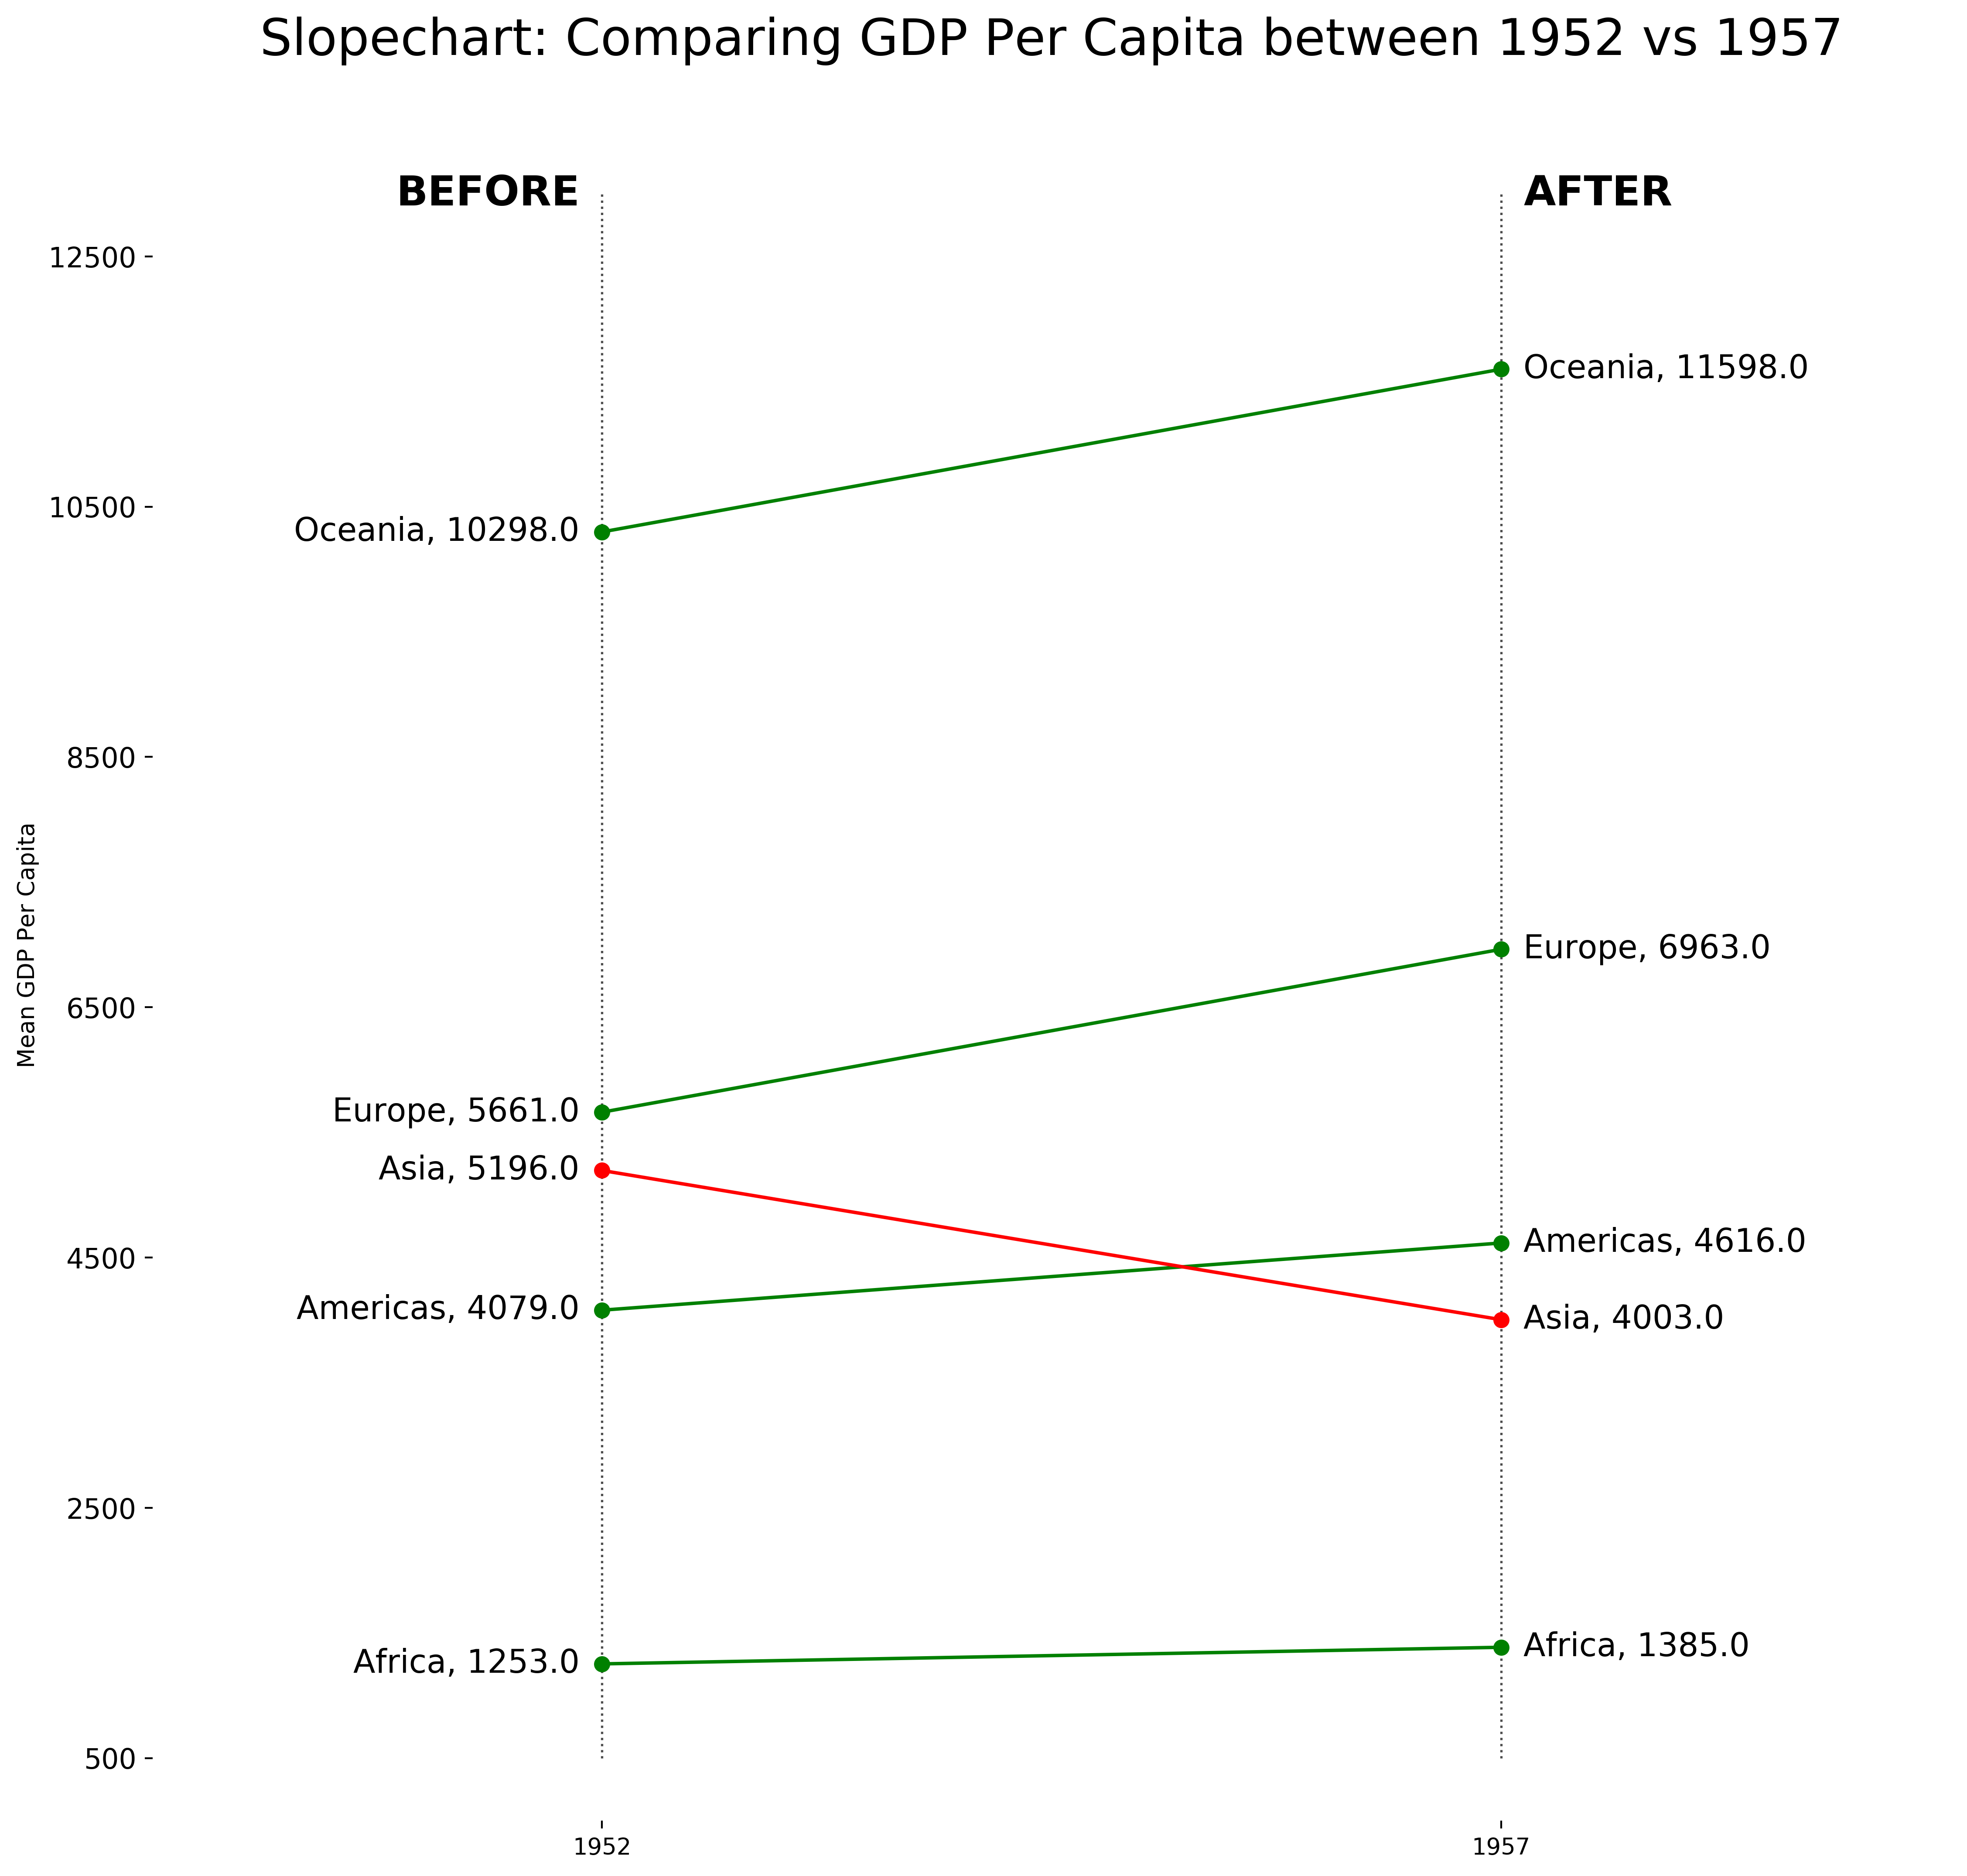

In [7]:
SlopeChart(series1, series2, title, xlabel, ylabel, lebel)

In [8]:
df2 = pd.read_csv('c:/1/WorldHappinessReport.csv')
df2.head(5)

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0
2,2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015.0
3,3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015.0
4,4,Argentina,Latin America and Caribbean,30.0,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2015.0


In [9]:
kot = df2.pivot_table(index='Region',columns=['Year'], values='Happiness Rank', aggfunc='mean')
kot

Year,2015.0,2016.0,2017.0
Region,,,
Australia and New Zealand,9.500000,8.500000,9.000000
Central and Eastern Europe,79.000000,78.448276,75.068966
Eastern Asia,64.500000,67.166667,63.600000
Latin America and Caribbean,46.909091,48.333333,50.772727
Middle East and Northern Africa,77.600000,78.105263,76.421053
North America,10.000000,9.500000,10.500000
Southeastern Asia,81.222222,80.000000,73.750000
Southern Asia,113.142857,111.714286,109.857143
Sub-Saharan Africa,127.900000,129.657895,127.871795


In [10]:
PKP = kot.reset_index()
labelPKP = PKP['Region'].to_list()
labelPKP

['Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Western Europe']

In [11]:
PKP.columns

Index(['Region', 2015.0, 2016.0, 2017.0], dtype='object', name='Year')

In [12]:
PKP.columns = ['Region', '2015', '2016', '2017']

In [13]:
series1 = np.round(PKP['2015'].to_list(), decimals=1)
series1

array([  9.5,  79. ,  64.5,  46.9,  77.6,  10. ,  81.2, 113.1, 127.9,
        29.5])

In [14]:
series2 = np.round(PKP['2017'].to_list(), decimals=1)
series2

array([  9. ,  75.1,  63.6,  50.8,  76.4,  10.5,  73.8, 109.9, 127.9,
        27.1])

In [15]:
def SlopeChart(series1, series2, title, xlabel, ylabel, lebelPKP):
    
# Labels formatting
    left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(labelPKP, series1)]
    right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(labelPKP, series2)]
    klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(series1, series2)]

# lines color
    def newline(p1, p2, color='black'):
        ax = plt.gca()
        l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
        ax.add_line(l)
        return l

    fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 380)

# Vertical Lines
    ax.vlines(x=1, ymin=0, ymax=120, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
    ax.vlines(x=3, ymin=0, ymax=120, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
    ax.scatter(y=series1, x=np.repeat(1, PKP.shape[0]), s=10, color='black', alpha=0.7)
    ax.scatter(y=series2, x=np.repeat(3, PKP.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
    for p1, p2, c in zip(series1, series2, labelPKP):
        newline([1,p1], [3,p2])
        ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
        ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
    ax.text(1-0.05, 140, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
    ax.text(3+0.05, 140, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
    ax.set_title(title, fontdict={'size':22})
    ax.set(xlim=(0,4), ylim=(0,150), ylabel=ylabel) ## Skala osi Y
    ax.set_xticks([1,3])
    ax.set_xticklabels(xlabel)
    plt.yticks(np.arange(20, 150, 40), fontsize=12)  ## Podziałaka osi Y

# Lighten borders
    plt.gca().spines["top"].set_alpha(.0)
    plt.gca().spines["bottom"].set_alpha(.0)
    plt.gca().spines["right"].set_alpha(.0)
    plt.gca().spines["left"].set_alpha(.0)
    plt.show()



In [16]:
labelPKP
series1
series2
title = 'Changing the the level of happiness: 2015 vs. 2017'
ylabel ='Less points - more happiness'
xlabel =["2015", "2017"]

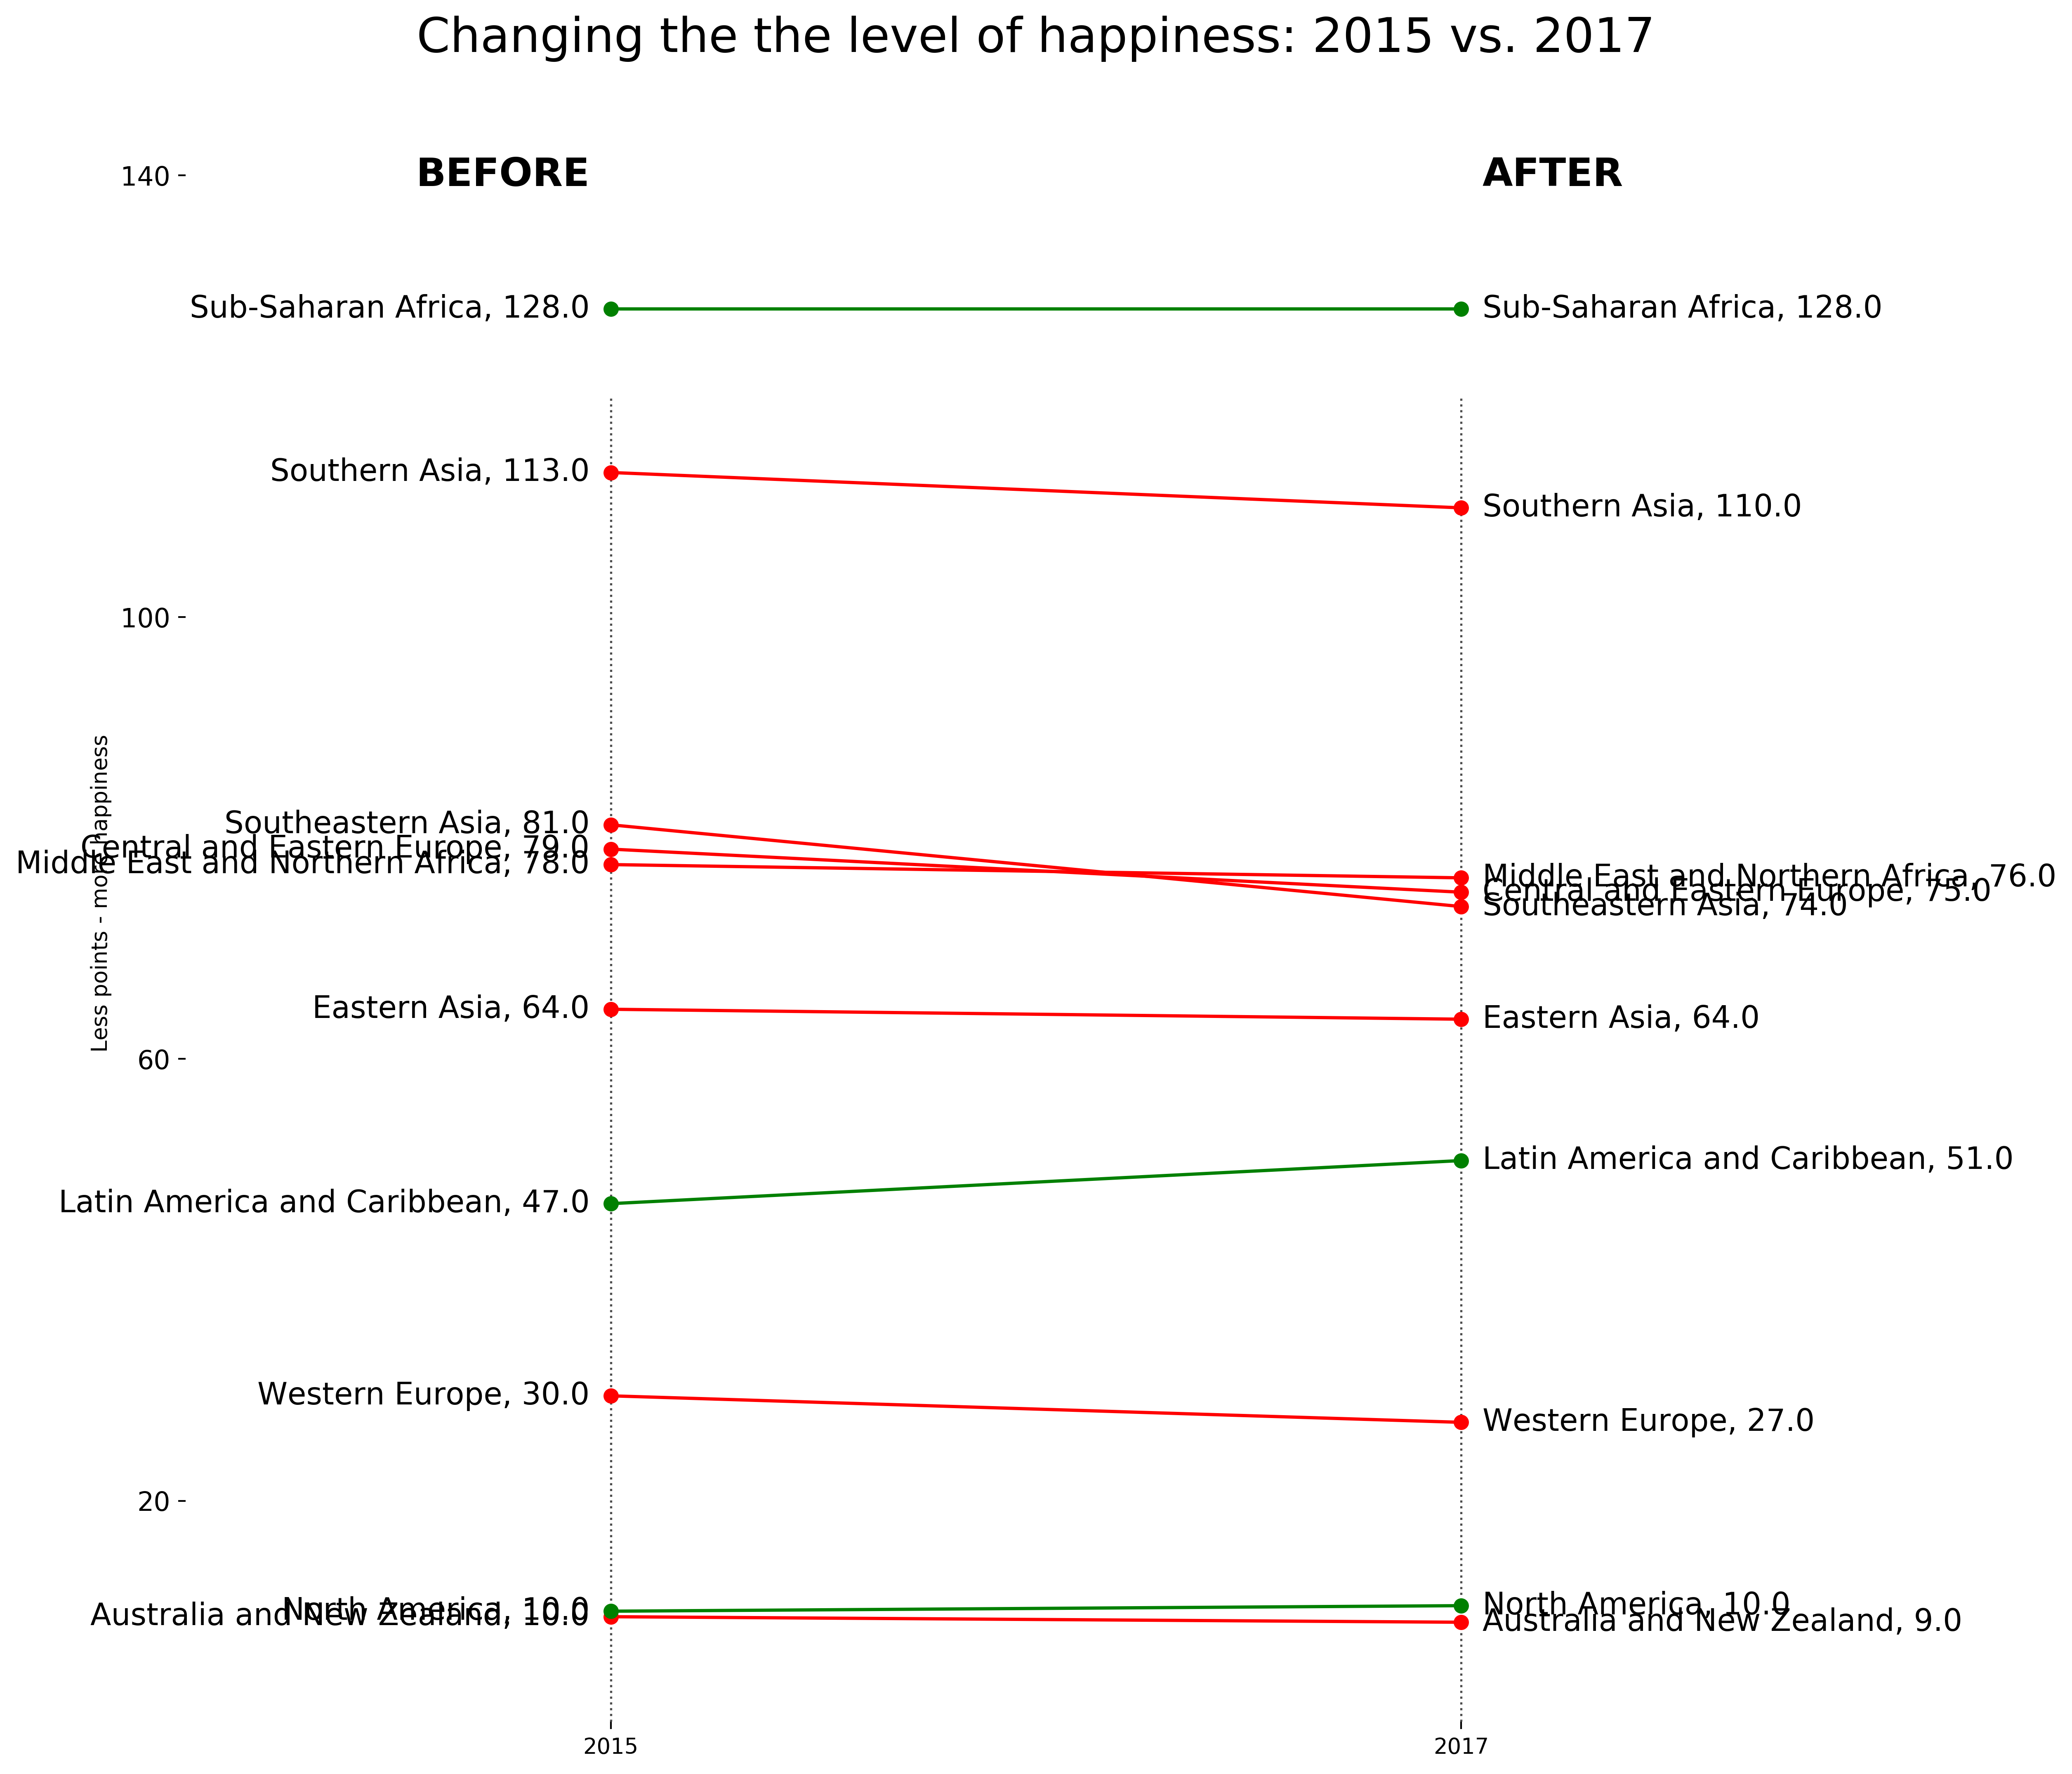

In [17]:
SlopeChart(series1, series2, title, xlabel, ylabel, labelPKP)